In [2]:
import numpy as np

**Zadanie domowe!**

Zgodnie z tym jak zapisaliśmy nasz kod, może się zdarzyć, że rząd macierzy jest odpowiedni, ale w pewnym momencie wystąpi dzielenie przez zero i funkcja zwróci wartość `False`. Wynika to z przypadkowo niefortunnego ustawienia kolejności wierszy. Żeby temu zaradzić, wprowadźmy poprawki, które pozwolą w wypadku wystąpienia dzielenia przez zero zamienić wiersze miejscami, tak, żeby nowy czynnik przez który chcemy dzielić był niezerowy. Jeśli wszystkie dalsze wiersze nie zawierają takiego czynnika, możemy przejść do następnego kroku, gdyż mamy już odpowiednie elementy wyzerowane. 

Przykładowo, jeśli mamy macierz:<br>
$
A = \left( \begin{array}{cccc|c}
1 & 1 & 1 & 1 & 3 \\
2 & 2 & 5 & 3 & 8 \\
0 & 0 & 1 & 1 & 0 \\
1 & 0 & 1 & 0 & 2
\end{array} \right),
$<br>
w pierwszym kroku po zadziałaniu naszym algorytmem dostaniemy<br>
$
\left( \begin{array}{cccc|c}
1 & 1 & 1 & 1 & 3 \\
0 & 0 & 3 & 1 & 2 \\
0 & 0 & 1 & 1 & 0 \\
0 & -1 & 0 & -1 & -1
\end{array} \right),
$ a to oznacza, że w następnym będzie dzielenie przez zero, możemy jednak zamienić miejscami wiersz drugi z czwartym:<br>
$
\left( \begin{array}{cccc|c}
1 & 1 & 1 & 1 & 3 \\
0 & -1 & 0 & -1 & -1 \\
0 & 0 & 1 & 1 & 0 \\
0 & 0 & 3 & 1 & 2
\end{array} \right).
$ Tym sposobem problem dzielenia przez zero został rozwiązany, a my możemy dalej wykonywać procedurę, więc w następnym kroku mamy:<br>
$
\left( \begin{array}{cccc|c}
1 & 1 & 1 & 1 & 3 \\
0 & -1 & 0 & -1 & -1 \\
0 & 0 & 1 & 1 & 0 \\
0 & 0 & 0 & -2 & 2
\end{array} \right),
$ co kończy proces. Ostatecznie rozwiązania to $x_1 = 1$, $x_2 = 2$, $x_3 = 1$ oraz $x_4 = -1$. 

Do zamiany wierszy w kodzie możemy posłuzyć się poniższą formułą:

In [3]:
A = np.array([[1, 1 ,1], [2, 2, 2], [3, 3, 3]])
print(A) 
#zamiana wiersza drugiego z trzecim
A[[1,2]] = A[[2,1]] #ważne są podwójne nawiasy
print(A)

[[1 1 1]
 [2 2 2]
 [3 3 3]]
[[1 1 1]
 [3 3 3]
 [2 2 2]]


Zadanie polega więc na napisaniu funkcji `triangle_better`, która będzie ulepszoną wersją funkcji `triangle`, wykorzystującą powyższą metodę.

Przykład:

In [4]:
M = np.array([[1, 1, 1, 1, 3], [2, 2, 5, 3, 8], [0, 0, 1, 1, 0], [1, 0, 1, 0, 2]])
print(M)

[[1 1 1 1 3]
 [2 2 5 3 8]
 [0 0 1 1 0]
 [1 0 1 0 2]]


In [80]:
M_tr = triangle(M)
print(M_tr)

Dzielenie przez zero!
False


In [81]:
M_tr = triangle_better(M)
print(M_tr)

[[ 1.  1.  1.  1.  3.]
 [ 0. -1.  0. -1. -1.]
 [ 0.  0.  1.  1.  0.]
 [ 0.  0.  0. -2.  2.]]


In [82]:
X = solve(M_tr)
print(X)

[ 1.  2.  1. -1.]


Powodzenia!

**Rozwiązanie**

In [8]:
import numpy as np

def triangle_better(A):
    shape = A.shape #pobieramy wymiary naszej macierzy, ponieważ jest to macierz rozszerzona mamy NxN+1
    N = shape[0]
    A = A.copy().astype('f') #tworzymy kopię oraz ustalamy typ wszystkich elementów na float
    if np.linalg.matrix_rank(A) < N: #sprawdzamy, czy istnieje jedno rozwiązanie
        print('Brak jednoznacznych rozwiązań!')
        return False
    for i in range(0, N - 1): #tworzymy pętlę w której będziemy tworzyli zera w odpowiedniej kolumnie
        for j in range(i + 1, N, 1): #tworzymy pętlę do modyfikowania wierszy
            if A[i, i] != 0: #sprawdzamy, czy nie będzie występowało dzielenie przez zero
                param = -A[j, i] / A[i, i] #obliczamy czynnik przez który mnożymi pierwszy wiersz w kroku
                A[j] += param * A[i] #modyfikujemy odpowiedni wiersz
            else: #pojawia się dzielenie przez zero
                for k in range(i + 1, N): #przeszukujemy następne wiersze w celu znalezienia niezerowego elementu
                     if A[k, i] != 0: #jeśli znaleźliśmy niezerowy element zamieniamy wiersze miejscami
                        A[[k, i]] = A[[i, k]]
                        break #po zamianie drugi wiersz już ma zero, więc możemy przejść do następnego j
    return A #zwracamy macierz trójkątną

def solve(M_tr):
    M_tr = M_tr.copy().astype('f') #zaczynamy od kopii macierzy trójkątnej i ustalenia typy float elementów
    N = M_tr.shape[0] #pobieramy rozmar macierzy

    X = np.zeros(N + 1) #tworzymy za pomocą metody zeros wektor o długości N+1
    X[-1] = 1 #ostatni element ustawiamy na 1 jako zerowy krok
    #dla wygody ustalamy, że zmienna i będzie przechodzić od -1 do -N co pozwala numerować nią ostatnie elementy 
    for i in range(-1, -N - 1, -1):                           
        vec = M_tr[i] #pobieramy odpowiedni wiersz
        dot = np.dot(vec, X) #obliczamy iloczyn skalarny
        X[i - 1] = -dot / vec[i - 1] #aktualizujemy wektor rozwiązań
        
    return -X[:-1] #zwracamy pierwsze N elementów z przeciwnym znakiem

In [9]:
M = np.array([[1, 1, 1, 1, 3], [2, 2, 5, 3, 8], [0, 0, 1, 1, 0], [1, 0, 1, 0, 2]]) #typowa macierz
B = np.array([[0, 0, 0, 1, 1], [1, 1, 1, 1, 0], [1, 1, 0, 1, -1],[1, 0, 1, 1, 1]]) #problematyczna macierz
M_tr = triangle_better(M)
print(M_tr)
B_tr = triangle_better(B)
print(B_tr)

[[ 1.  1.  1.  1.  3.]
 [ 0. -1.  0. -1. -1.]
 [ 0.  0.  1.  1.  0.]
 [ 0.  0.  0. -2.  2.]]
[[ 1.  1.  1.  1.  0.]
 [ 0. -1.  0.  0.  1.]
 [ 0.  0. -1.  0. -1.]
 [ 0.  0.  0.  1.  1.]]


In [10]:
X_M = solve(M_tr)
X_B = solve(B_tr)
print(X_M)
print(X_B)

[ 1.  2.  1. -1.]
[-1. -1.  1.  1.]


**Zadanie**

Znajdowanie pierwiastka funkcji metodą Newtona.<br>
Celem będzie napisanie programu znajdującego pierwiastek podanej funkcji $f(x)$ oraz rysującego na wykresie kolejne kroki obliczeń. Metoda polega na znajdowaniu kolejnego, przybliżonego rozwiązania za pomocą stycznych do wykresu.<br>
1. Wybieramy przedział [a, b], na którym wiemy że znajduje się **dokładnie jedno rowiązanie** oraz ustalamy jak dokładny ma być wynik za pomocą zmiennej $\epsilon$, na przykład $\epsilon = 0.01$.<br>
2. Wybieramy punkt będący w połowie tego przedział $x_0 = (a + b) / 2$.<br>
3. Znajdujemy styczną do punktu $(x_0, f(x_0))$.
4. Znajdujemy punkt przecięcia stycznej z osią 0x -> jest to nasz nowy punkt $x_0$.
5. Jeśli $|f(x_0)| < \epsilon$ to kończymy proces i nasze przybliżone rozwiązanie to $x_0$, jeśli jednak nierówność nie jest spełniona wracamy do kroku 3.

**Rozwiązanie**

Zacznijmy od zaimporotwanie potrzebnych bibliotek.

In [11]:
from matplotlib import pyplot as plt
import numpy as np

Stwórzmy funkcję `rownanie`, zwracającą wartości funkcji, której miejsc zerowych szukamy.

In [12]:
def rownanie(x):
    return 2 * x ** 2 - 3 * x - 20 #zwykła funkcja kwadratowa, x1 = -2.5, x2 = 4

Możemy ją sobie narysować np. na przedziale [-10, 10].

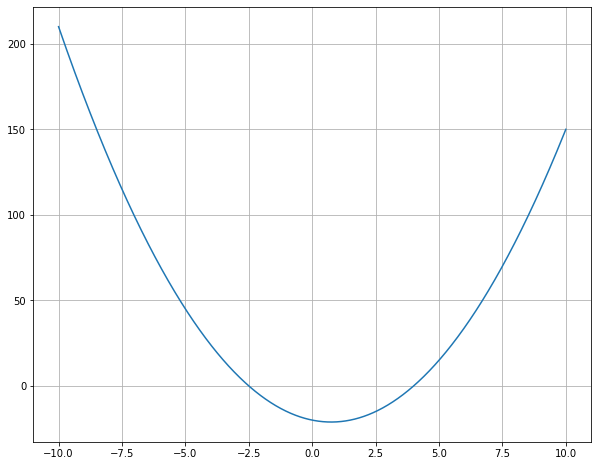

In [13]:
X = np.linspace(-10, 10, 1001)
Y = rownanie(X)
fig, ax = plt.subplots(1, figsize = ((10, 8)))
ax.plot(X, Y)
ax.grid()
plt.show()

Teraz napiszmy funkcję `styczna`, która będzie zwracać współczynnik kierunkowy oraz wyraz wolny stycznej do funkcji w podanym punkcie `x0`.

In [14]:
def styczna(f, x0):
    # pochodna naszej funkcji 4 * x - 3
    a = 4 * x0 - 3 #współczynnik kierunkowy
    b = f(x0) - a * x0 #wyraz wolny
    return (a, b)

Możemy sprawdzić jak to wygląda rysując jeszcze raz wykres funkcji i do tego styczną wyliczoną powyższą funkcją. Dodatkowo, zaznaczmy na rysunku także punkt przecięcia stycznej z osią 0x.

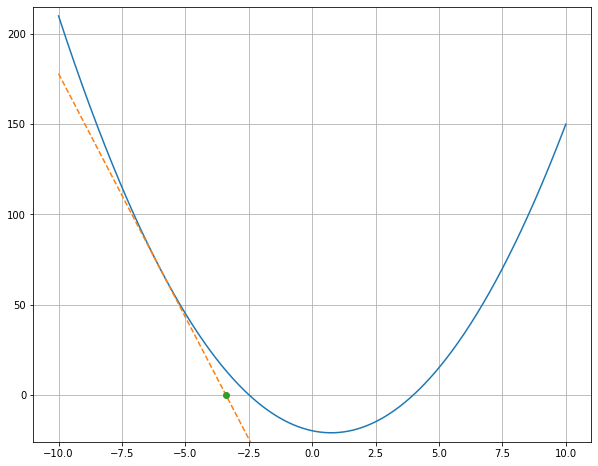

In [15]:
X = np.linspace(-10, 10, 1001) #ten sam przedział co wcześniej
Y = rownanie(X) #obliczamy wartości funkcji dla podanych xów
x0 = -6 #definiujemy w jakim punkcie wyliczyć styczną
a, b = styczna(rownanie, x0) #obliczamy parametry stycznej
S = a * X + b #obliczamy styczną dla podanych xów

fig, ax = plt.subplots(1, figsize = ((10, 8)))
ax.plot(X, Y) #wykres funkcji
ax.plot(X, S, '--') #wykres stycznej, argument '--' oznacza, że wykres będzie narysowany linią przerywaną
ax.plot(-b / a, 0., 'o')# punkt przecięcia stycznej z osią 0x, argument 'o' oznacza, że rysujemy punkt
ax.set_ylim([np.min(Y) - 5, np.max(Y) + 5]) #ustalamy granice rysowanie funkcji na osi y
ax.grid()
plt.show()

Jak widać, funkcja prawidłowo liczy współczynniki stycznej, możemy więc przejść do napisania ostatniej funkcji `mNewton` czyli do zaimplementowania metody Newtona do znajdowania miejsca zerowego. Argument `f` będzie zawierał funkcję, argumenty `left` oraz `right` to granice, a `eps` to dokładność przy jakiej chcemy zakończyć obliczenia. 

In [16]:
def mNewton(f, left, right, eps):
    x0 = (right + left) / 2 #wybieramy punkt w połowie pomiędzy granicami
    count = 0 #dodatkowo będziemy liczyli liczbę kroków
    while np.abs(f(x0)) > eps: #jeśli zbliżymy się z wartością funkcji dostatecznie blisko zera, to kończymy
        a, b = styczna(f, x0) #obliczamy parametry stycznej
        x0 = -b / a #obliczamy nowy punkt x0
        count += 1 #zwiększamy o jeden liczbę kroków
    return (count, x0) #zwracamy liczbę kroków oraz wynik

Sprawdźmy, że funkcja prawidłowo znajduje lewy pierwiastek

In [17]:
count, result = mNewton(rownanie, -10, 0, 0.01)
print('Liczba kroków: ', count, '\nPierwiastek: ', result, sep = '')

Liczba kroków: 3
Pierwiastek: -2.500230413937321


Oraz prawy

In [18]:
count, result = mNewton(rownanie, 2, 10, 0.01)
print('Liczba kroków: ', count, '\nPierwiastek: ', result, sep = '')

Liczba kroków: 3
Pierwiastek: 4.000061066917204


Zmodyfikujmy teraz funkcję `mNewton` tak, żeby w każdym kroku rysowała także styczną (jako pomarańczową linię przerywaną) oraz punkt przecięcia stycznej z osią 0x (jako zielony punkt). Poniżej przepisane wszystkie funkcje i gotowy program.

In [19]:
from matplotlib import pyplot as plt
import numpy as np

def rownanie(x):
    return 2 * x ** 2 - 3 * x - 20 #zwykła funkcja kwadratowa, x1 = -2.5, x2 = 4

def styczna(f, x0):
    # pochodna naszej funkcji 4 * x - 3
    a = 4 * x0 - 3 #współczynnik kierunkowy
    b = f(x0) - a * x0 #wyraz wolny
    return (a, b)

def mNewton(f, left, right, eps):
    x0 = x0 = (right + left) / 2 #wybieramy punkt w połowie pomiędzy granicami
    count = 0 #dodatkowo będziemy liczyli liczbę kroków
    while np.abs(f(x0)) > eps: #jesli zblizymy się z wartością funkcji dostatecznie blisko, to kończymy działanie
        a, b = styczna(f, x0) #obliczamy parametry stycznej
        Ys = a * X + b #obliczamy wartości stycznej
        ax.plot(X, Ys, '--', color = 'orange') #rysujemy styczną jako przerywaną '--' oraz pomarańczoną
        x0 = -b / a #obliczamy nowy punkt x0
        ax.plot(x0, 0, 'o', color = 'green') #rysujemy punkt przecięcia stycznej z osią 0x
        count += 1 #zwiększamy o jeden liczbę kroków
    return (count, x0) #zwracamy liczbę kroków oraz wynik

Liczba kroków: 4
Pierwiastek: -2.5002991334542717


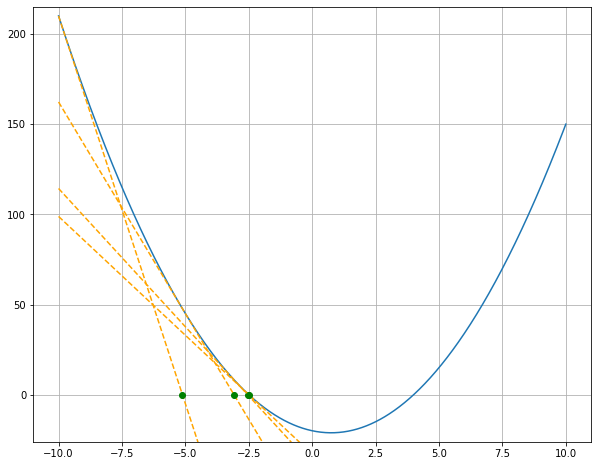

In [20]:
fig, ax = plt.subplots(1, figsize = ((10, 8)))
X = np.linspace(-10, 10, 1001)
Y = rownanie(X)
ax.plot(X, Y)
count, result = mNewton(rownanie, -20, 0, 0.01)
print('Liczba kroków: ', count, '\nPierwiastek: ', result, sep = '')

ax.set_ylim([np.min(Y) - 5, np.max(Y) + 5])
ax.grid()
plt.show()

A dla prawego rozwiązania:

Liczba kroków: 4
Pierwiastek: 4.000177481691504


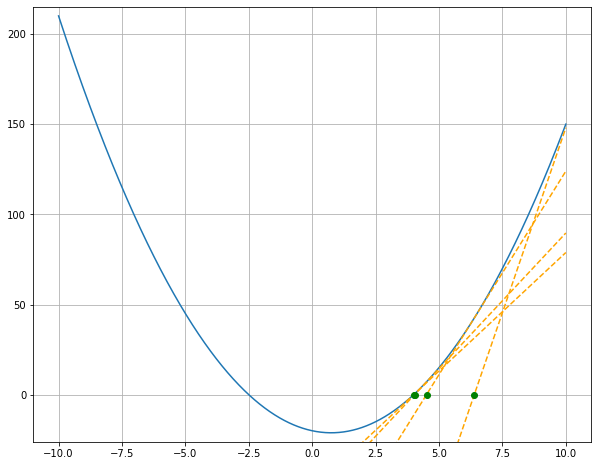

In [21]:
fig, ax = plt.subplots(1, figsize = ((10, 8)))
X = np.linspace(-10, 10, 1001)
Y = rownanie(X)
ax.plot(X, Y)
count, result = mNewton(rownanie, 2, 20, 0.01)
print('Liczba kroków: ', count, '\nPierwiastek: ', result, sep = '')

ax.set_ylim([np.min(Y) - 5, np.max(Y) + 5])
ax.grid()
plt.show()

Kod wygląda dobrze, jednak zauważmy, że jeśli chcemy znaleźć rozwiązania dla innej funkcji musimy nie tylko zmodyfikować funkcję `rownanie` ale także ręcznie policzyć pochodną i zmodyfikować funkcję `styczna`. Postarajmy się więc przepisać funkcję `styczna` tak, żeby obliczała pochodną w punkcie dowolnej funkcji samodzielnie.

W tym celu skorzystajmy z numerycznej metody pozwalającej policzyć pochodną. Przypomnijmy, że matematycznie pochodna wyraża się jako
$f'(x) = \lim_{\Delta x \to \infty} \frac{f(x + \Delta x) - f(x)}{\Delta x}$. Ponieważ na komputerze nie jesteśmy w stanie operować nieskończenie małymi wilekościami, przybliżoną wartość pochodnej otrzymamy obliczając:<br>
$f'(x) \approx \frac{f(x + \Delta x) - f(x)}{\Delta x}$ dla ustalonego, małego $\Delta x$.

W takiej sytuacji jedyne co musimy znać to wartość funkcji dla $x$ oraz $x + \Delta x$, przepiszmy więc naszą funkcję `styczna`

In [22]:
def styczna(f, x0):
    dx = 0.001 #ustalamy dosyć małą wartość dx
    a = (f(x0 + dx) - f(x0)) / dx #korzystamy ze wzoru na iloraz różnicowy
    b = f(x0) - a * x0 #obliczamy tak jak poprzednio wyraz wolny
    return (a, b) #zwracamy wyniki

Przetestujmy działanie dla przykładu funkcji kwadratowej, stwórzmy więc nową funkcję `funkcja`, która będzie zwracała wartość wybranej funkcji kwadratowej (robiliśmy podobną funkcję już wcześniej) oraz funkcję `dfunkcja`, zwracającą wartość pochodnej (w celu porównania)

In [23]:
def funkcja(x, a = 1, b = 0, c = 0):
    return a * x ** 2 + b * x + c

def dfunkcja(x, a = 1, b = 0):
    return 2 * a * x + b

In [24]:
print(funkcja(2))
print(dfunkcja(2))

4
4


In [25]:
print(funkcja(2, 1, 1))
print(dfunkcja(2, 1, 1))

6
5


In [26]:
print(funkcja(2, 1, 1, 1))
print(dfunkcja(2, 1, 1))

7
5


Wszystko działa, porównajmy więc wyniki `dfunkcja` ze `styczna`

In [27]:
X = np.linspace(0, 9, 10)
Y_true = dfunkcja(X)
Y_num = styczna(funkcja, X)

print('  Pochodna | Analityczna | Numeryczna ')
for x, yt, yn in zip(X, Y_true, Y_num[0]):
    print("  f'(", x, ")  |     ", yt, "     |   ", yn, 6, "    ", sep = "")

  Pochodna | Analityczna | Numeryczna 
  f'(0.0)  |     0.0     |   0.0016    
  f'(1.0)  |     2.0     |   2.00099999999969756    
  f'(2.0)  |     4.0     |   4.0009999999996996    
  f'(3.0)  |     6.0     |   6.0009999999994796    
  f'(4.0)  |     8.0     |   8.00100000000376    
  f'(5.0)  |     10.0     |   10.0010000000025916    
  f'(6.0)  |     12.0     |   12.0010000000050356    
  f'(7.0)  |     14.0     |   14.001000000007486    
  f'(8.0)  |     16.0     |   16.0009999999886086    
  f'(9.0)  |     18.0     |   18.0009999999839476    


Widzimy więc, że wyniki numeryczne zgadzają się z analitycznymi z dokładnością do użytego $\Delta x$. Użyjmy więc naszej nowej funkcji `styczna` do policzenia miejsca zerowego bardziej skomplikowanej funkcji. Cały kod wraz z nową funkcją `funkcja` znajduje się poniżej

In [28]:
from matplotlib import pyplot as plt
import numpy as np

def funkcja(x):
    return np.sin(0.3 * (x - 1)) * np.exp(-0.1 * x)

def styczna(f, x0):
    dx = 0.001 #ustalamy dosyć małą wartość dx
    a = (f(x0 + dx) - f(x0)) / dx #korzystamy ze wzoru na iloraz różnicowy
    b = f(x0) - a * x0 #obliczamy tak jak poprzednio wyraz wolny
    return (a, b) #zwracamy wyniki

def mNewton(f, left, right, eps):
    x0 = x0 = (right + left) / 2 #wybieramy punkt w połowie pomiędzy granicami
    count = 0 #dodatkowo będziemy liczyli liczbę kroków
    while np.abs(f(x0)) > eps: #jesli zblizymy się z wartością funkcji dostatecznie blisko, to kończymy działanie
        a, b = styczna(f, x0) #obliczamy parametry stycznej
        Ys = a * X + b #obliczamy wartości stycznej
        ax.plot(X, Ys, '--', color = 'orange') #rysujemy styczną jako przerywaną '--' oraz pomarańczoną
        x0 = -b / a #obliczamy nowy punkt x0
        ax.plot(x0, 0, 'o', color = 'green') #rysujemy punkt przecięcia stycznej z osią 0x
        count += 1 #zwiększamy o jeden liczbę kroków
    return (count, x0) #zwracamy liczbę kroków oraz wynik

Liczba kroków: 3
Pierwiastek: 0.999996910360776


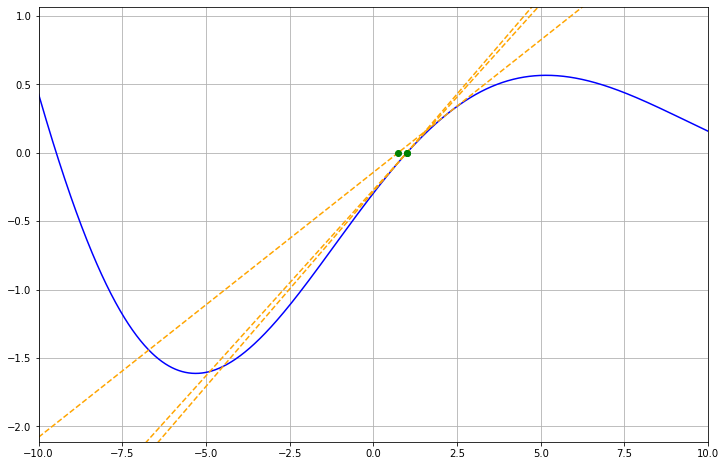

In [29]:
fig, ax = plt.subplots(1, figsize = (12, 8))

X = np.linspace(-10, 10, 1000)
Y = funkcja(X)
ax.plot(X, Y, color = 'blue')

result = mNewton(funkcja, -0.5, 5., 0.001)
print('Liczba kroków: ', result[0], '\nPierwiastek: ', result[1], sep = '')

ax.set_xlim([X[0], X[-1]])
ax.set_ylim([np.min(Y) - .5, np.max(Y) + .5])
ax.grid()
plt.show()

Rzeczywiście $x_0 = 0.999996910360776$ spełnia zadanie, sprawdźmy że $f(0.999996910360776)$ jest dostatecznie blisko zera

In [30]:
funkcja(0.999996910360776)

-8.38686612560864e-07

**Zadanie domowe!**

Napisz program, który:<br>
1. Będzie prosił o podanie funkcji zmiennej x `'Podaj funkcję f(x): '`. Jeśli użytkownik poda ją błędnie wyświetl komunikat `'Złe wyrażenie!'` i tak aż do momentu w którym wyrażenie będzie prawidłowe. <br>
2. Następnie będzie poprosił o podanie przedziału na którym ma być narysowana funkcja `'Podaj przedział (po przecinku): '`. Również tutaj, jeżeli coś zostało wprowadzone nie tak, ma wyświetlać się komunikat `'Zły przedział!'`.<br>
3. Program rysuje wykres.<br>
4. Na koniec program ma pytać `'Czy chcesz zakończyć (y/n): '`. Jeżeli urzytkownik wpisze `n` program ma zacząć pracę od początku i wrócić do punktu 1. Jeśli zostanie wpisane `y` program ma się zakończyć. Jeśli zostanie wpisane cokolwiek innego program ma do skutku wyświetlać `'Czy chcesz zakończyć (y/n): '` aż to uzyskania popranego wpisu.

Przykład działania:

Podaj funkcję f(x): x + y
Złe wyrażenie!
Podaj funkcję f(x): x ** y
Złe wyrażenie!
Podaj funkcję f(x): x ** 2 + 2.5 * x - 1./3
Podaj przedział (po przecinku): -10, 10


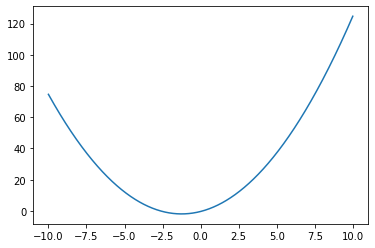

Czy chcesz zakończyć (y/n): n
Podaj funkcję f(x): x ** 2
Podaj przedział (po przecinku): 1, 1
Zły przedział!
Podaj przedział (po przecinku): ala
Zły przedział!
Podaj przedział (po przecinku): -2, 2


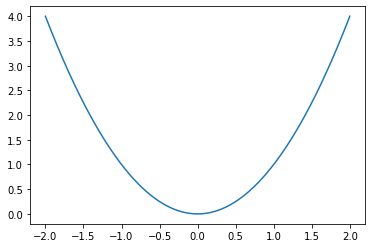

Czy chcesz zakończyć (y/n): ala 
Czy chcesz zakończyć (y/n): nie
Czy chcesz zakończyć (y/n): tak
Czy chcesz zakończyć (y/n): 123
Czy chcesz zakończyć (y/n): nie wiem
Czy chcesz zakończyć (y/n): y


W celu ułatwienia zadania można skorzystać z wbudowanej funkcji `eval`, która wyrażenie zapisane jako ciąg znaków przepisuje na kod:

In [109]:
rownanie = input('Podaj funkcję f(x): ')

Podaj funkcję f(x): 2 * x


In [110]:
x = 5
wynik = eval(rownanie)
print(wynik)

10


Działa to też dla listy wartości (typ `ndarray`)

In [112]:
x = np.linspace(0, 10, 11)
wynik = eval(rownanie)
print(wynik)

[ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18. 20.]


Drugie ułatwienie to działanie aż do uzyskania odpowiedniego rezultatu. W tym celu możemy skorzystać z pętli `while`, która będzie działać w nieskończoność poprzez wstawienie do argumentu `True` (nie polecam odpalać poniższego kodu)

In [ ]:
while True:
    print('Ta pętla będzie wyświetlać tekst w nieskonczoność!')

Możemy jednak zakończyć jej działanie, za pomocą `break`. Przykładowo prosimy użytkownika o podanie wartości `10`, co zakończy pętlę. Jest to najprostrzy i jednocześnie skuteczny sposób na stworzenie pętli, która będzie działać nieokreśloną liczbę razy (w przeciwieństwie do pętli `for`)

In [113]:
while True:
    user = input('Proszę wpisać wartość 10: ')
    if user == '10':
        print('Dziękuję')
        break
    else:
        pass

Proszę wpisać wartość 10: 1
Proszę wpisać wartość 10: 2
Proszę wpisać wartość 10: 3
Proszę wpisać wartość 10: -10
Proszę wpisać wartość 10: ala
Proszę wpisać wartość 10: 10
Dziękuję


Powodzenia!